In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import time
from textblob import TextBlob
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/brandontruong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
messages = pd.read_csv('out.csv')

In [3]:
from collections import Counter
from pandas.plotting import scatter_matrix
from colour import Color
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

times = pd.to_datetime(messages.date)
message_daily = messages[messages.is_from_me == False].groupby([times.dt.date])
data = message_daily

def get_daily_info(group):
    text = '\n'.join(group.astype(str).tolist())
    tb = TextBlob(text)
    
    wc = tb.word_counts
    word_count = len(wc.keys())

    k = Counter(wc)
    top_words = k.most_common(100)

    sentiment = tb.sentiment
    return [word_count, sentiment]

data = data['text'].agg(get_daily_info)

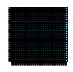

In [6]:
import matplotlib.pyplot as plt

polarity = list(Color("#FF5964").range_to(Color("#6BF178"),85))
subjectivity = list(Color("#FFFFFF").range_to(Color("#EAD94C"),40))
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(1, 1),
                        subplot_kw={'xticks': [], 'yticks': []})
outer = gridspec.GridSpec(30, 30, wspace=0, hspace=0)
counter = 0
for ss in outer:
    if counter > 899:
        break
    p = fig.add_subplot(ss)
    point_color = '#EAD94C'
    # wonky pos/neg coloring
    if data[counter][1][0] > 0:
        point_color = polarity[min(64, 35 + abs(round(data[counter][1][0] * 100)))]
    else:
        point_color = polarity[16 + min(0, round(data[counter][1][0] * 100))]
    p.scatter( 0 , 0 , s = 1409 * 1.06 / 1500 * data[counter][0], c = [point_color.hex] )
    p.set_facecolor(subjectivity[min(39, abs(round(data[counter][1][0] * 100)))].hex)
    p.set_yticklabels([])
    p.set_xticklabels([])
    p.set_xlabel('')
    p.set_ylabel('')
    counter += 1